<a href="https://colab.research.google.com/github/alshashiguchi/APIClojure/blob/master/Introdu%C3%A7%C3%A3o_a_machine_learning_e_classifica%C3%A7%C3%A3o_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atualizando seaborn**

In [1]:
!pip install seaborn==0.9.0

**Carregando biblioteca e os dados de uma RL**

In [2]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


**Alterando os nomes das colunas**

In [3]:
a_renomear = {
    'unfinished' : 'nao_finalizado',
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco'
    
}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


**Deixando o código mais amigavel**

Estamos criando uma coluna com a informção da projetos finalizados, que é o oposto da coluna nao_finalizado.
Facilitando o nosso trabalho.

In [0]:
troca = {
    0 : 1,
    1 : 0,
}

dados['finalizado'] = dados.nao_finalizado.map(troca)


**Criando gráfico para plotar os pontos (horas_esperadas X preco)**

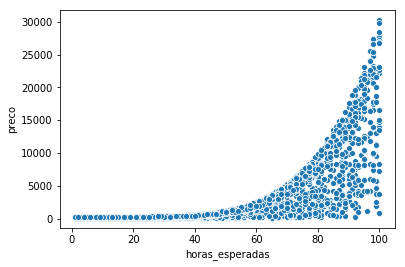

In [5]:
import seaborn as sns
sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

**Gráfico com 3 dimensões(preço, horas e finalizado)**

Plotando a classe finalizando no grafico. Para verificar quantos projetos foram finalizados pelo valor e horas.

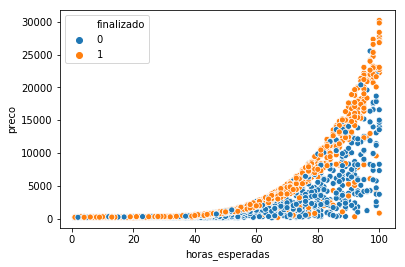

In [6]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=dados)

Plot relativo

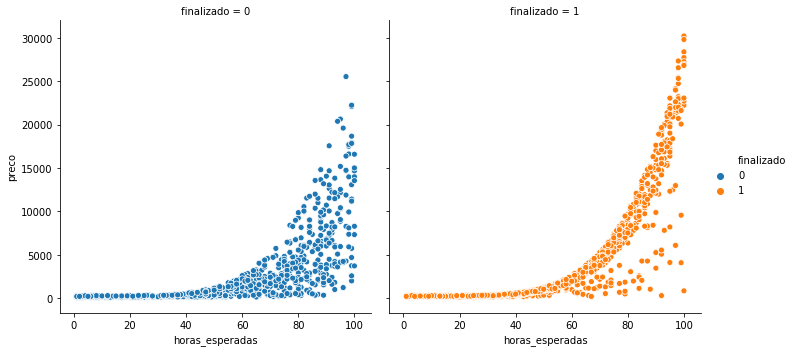

In [8]:
sns.relplot(x='horas_esperadas', y='preco', hue='finalizado', col='finalizado', data=dados)

###Inicio da modelagem

In [0]:
x = dados [['horas_esperadas', 'preco']]
y = dados ['finalizado']

###Criação do modelo

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20 #Definicao no numero inicial para os numeros aleatorios, para definir os numeros aleatorios pra nao ser tao aleatorios

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,random_state = SEED, stratify = y, test_size = 0.25)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print('A acurácia foi %.2f%%' % (acuracia * 100))


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 52.78%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


###Criação da comparação(Baseline)

É necessario saber se o codigo está prevendo corretamente, o algoritmo abaixo vai considerar que os 540 elementos completou o projeto.

In [11]:
import numpy as np
previsoes_de_base= np.ones(540)

acuracia_de_base = accuracy_score(teste_y, previsoes_de_base)
print('A acurácia de algoritimo de baseline foi %.2f%%' % (acuracia_de_base * 100))

A acurácia de algoritimo de baseline foi 52.59%


###Analisando cada uma das classificações

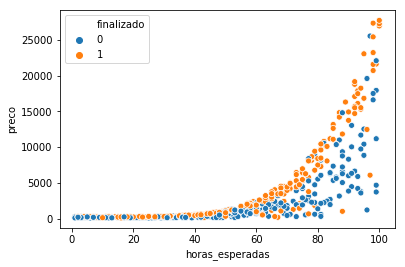

In [10]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=teste_x)

In [12]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [0]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [14]:
xx, yy = np.meshgrid (eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [15]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

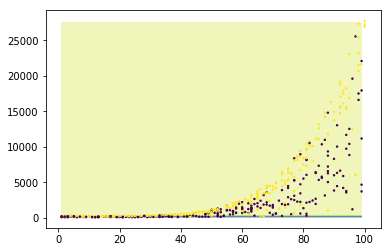

In [16]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=2)

###Teste com outro modelo

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20 #Definicao no numero inicial para os numeros aleatorios, para definir os numeros aleatorios pra nao ser tao aleatorios

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,random_state = SEED, stratify = y, test_size = 0.25)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print('A acurácia foi %.2f%%' % (acuracia * 100))


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 58.89%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1 100 101 27738


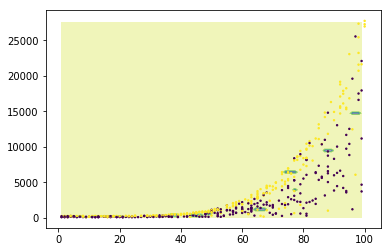

In [19]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid (eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=2)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20 #Definicao no numero inicial para os numeros aleatorios, para definir os numeros aleatorios pra nao ser tao aleatorios

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,random_state = SEED, stratify = y, test_size = 0.25)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)

scaler.fit(raw_teste_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print('A acurácia foi %.2f%%' % (acuracia * 100))


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 69.44%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


-1.74922127619939 1.708985499645416 -0.6021809401067274 4.727428286245816


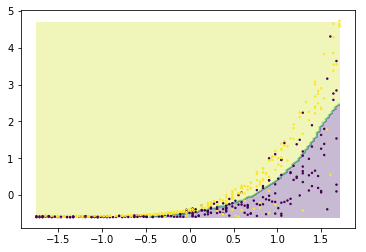

In [22]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

print(x_min, x_max, y_min, y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid (eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=2)